In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context('talk')
sns.set_style('white')
%matplotlib inline

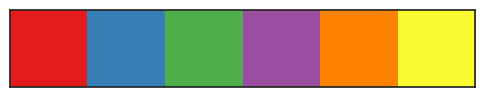

In [137]:
sns.palplot(
sns.color_palette('Set1'))
sns.set_palette(sns.color_palette('Set1'))

In [169]:
df = pd.read_csv('result_p09.csv')

In [170]:
df.describe()

,p,n,time,optimal_value,branches,leaves,stop_forced_branch,stop_delete_branch,stop_bounding,sop_nonedge_can_select
count,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,2.400000e+02,240.000000,2.400000e+02,240.0
mean,0.625000,8.666667,1436.458333,inf,5.620093e+04,10.879167,2.288712e+04,8591.287500,2.000195e+04,0.0
std,0.259142,1.976148,6700.133492,NaN,2.552975e+05,20.026499,1.116502e+05,36165.343295,1.037047e+05,0.0
min,0.300000,6.000000,0.000000,87.000000,5.000000e+00,0.000000,0.000000e+00,2.000000,0.000000e+00,0.0
25%,0.450000,7.000000,1.000000,227.250000,5.000000e+01,0.000000,7.000000e+00,15.250000,0.000000e+00,0.0
50%,0.600000,8.500000,10.000000,322.000000,4.780000e+02,5.000000,1.465000e+02,126.500000,3.700000e+01,0.0
75%,0.775000,10.000000,197.750000,inf,9.630000e+03,14.000000,3.189250e+03,1858.750000,1.379000e+03,0.0
max,1.000000,12.000000,79549.000000,inf,3.048902e+06,239.000000,1.384896e+06,421359.000000,1.242582e+06,0.0


In [171]:
df.tail()

,p,n,time,optimal_value,branches,leaves,stop_forced_branch,stop_delete_branch,stop_bounding,sop_nonedge_can_select,method
235,1.0,12,4327,185.0,166485,29,62788,25790,77850,0,mine
236,1.0,12,9657,229.0,366374,40,145128,57863,163304,0,mine
237,1.0,12,13403,171.0,526494,78,241566,80875,203898,0,mine
238,1.0,12,13541,154.0,504569,50,248577,67419,188474,0,mine
239,1.0,12,7408,180.0,282076,53,113411,44536,124024,0,mine


In [172]:
np.isinf(df.optimal_value)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23     False
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
210    False
211    False
212    False
213    False
214    False
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
Name: optimal_value, dtype: bool

In [173]:
data = []
for p in df.p.unique():
    _df = df[df.p == p]
    for n in _df.n.unique():
        _dfn = _df[_df.n == n]
        l = len(_dfn)
        i = np.isinf(_dfn['optimal_value']).sum()
        data.append({'n':n, 'p':p, 'solvable_ratio': 1.0 -  i / l})

df_solvable = pd.DataFrame(data)
g = sns.factorplot(data=df_solvable,hue='p',x='n',y='solvable_ratio',kind='point')
g.ax.set_ylim(0,1.05)
plt.savefig('hoge.png',dpi=200)

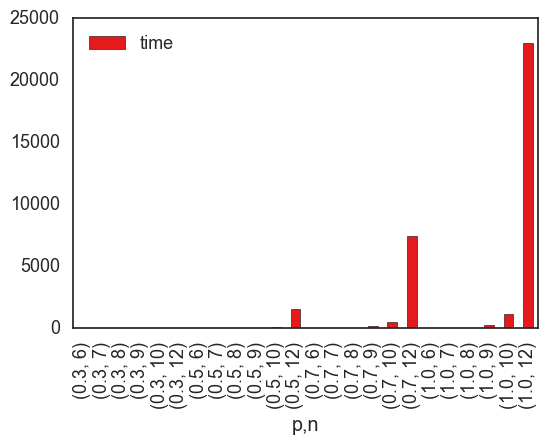

In [175]:
df.groupby(['p','n'],as_index=True).mean().plot(kind='bar',y='time')

0.3
0.5
0.7
1.0


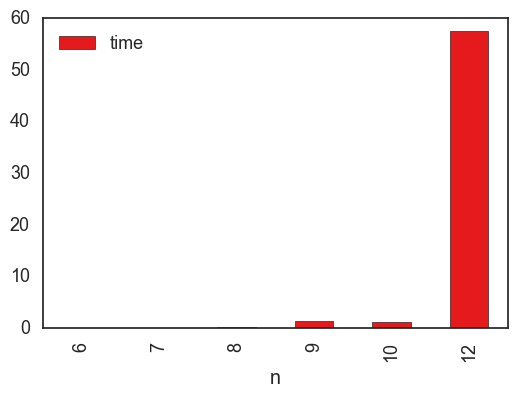

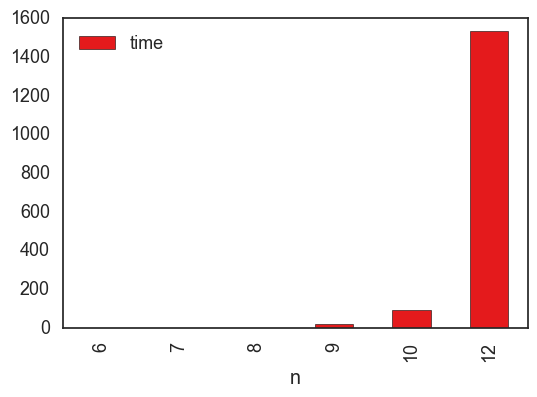

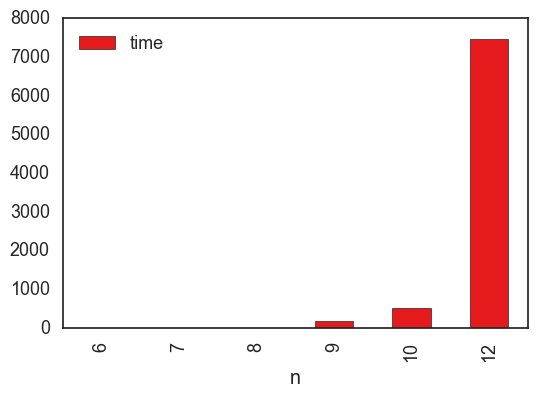

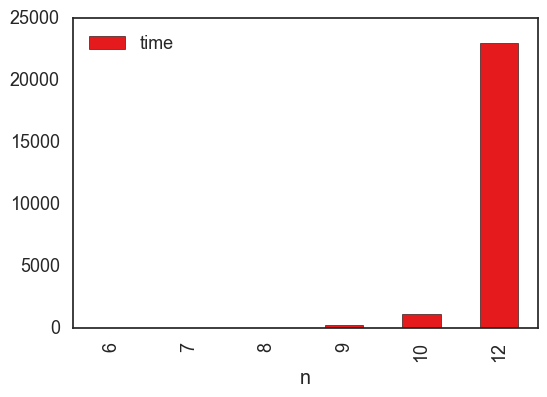

In [176]:
sns.set_palette(sns.color_palette('Set1')[0:])
use_cols = []
for c in df.columns:
    if 'stop' in c:
        use_cols.append(c)
use_cols = ['time']
for p in df.p.unique():
    print(p)
    df[df['p'] == p].groupby('n').mean()[use_cols].plot(kind='bar')
#     plt.yscale('log')

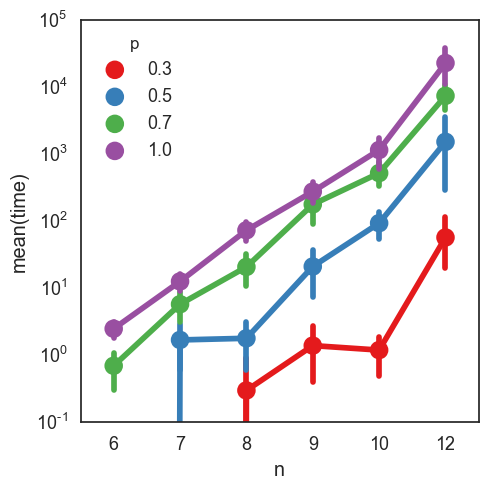

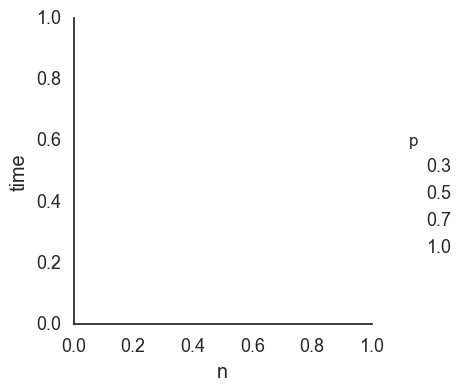

In [182]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
g = sns.factorplot(x="n", y="time", data=df, hue='p',ax=ax1)
ax1.set_yscale('log')
fig.tight_layout()
fig.savefig('n_time_hue-p.png',dpi=200)

In [179]:
g

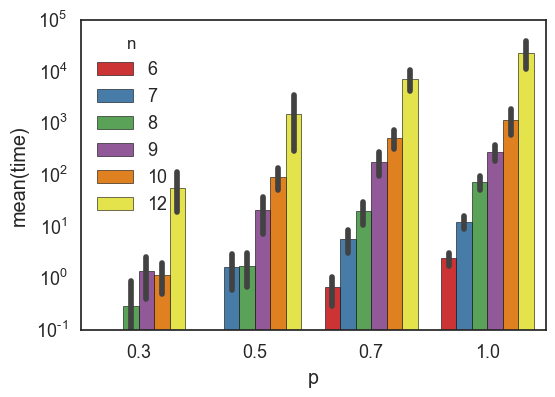

In [180]:
sns.barplot(x="p", y="time", data=df, hue='n')
plt.yscale('log')

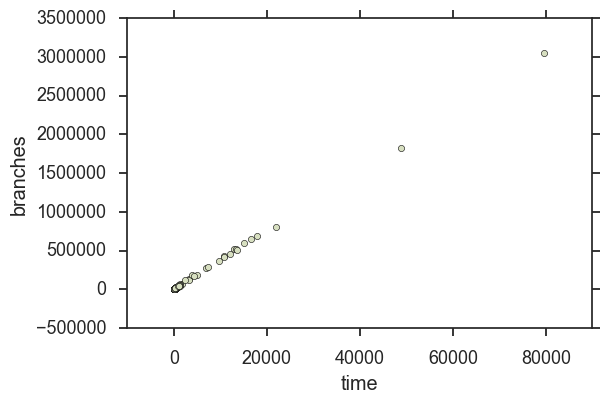

In [76]:
df.plot(x='time',y='branches',kind='scatter')

In [184]:
df = pd.read_csv('resultp03.csv')

In [185]:
df.head()

,p,n,time,optimal_value,branches,leaves,stop_forced_branch,stop_delete_branch,stop_bounding,sop_nonedge_can_select,method
0,0.3,6,0.0,inf,5,0,1,3,0,0,mine
1,0.3,6,0.0,inf,15,0,1,4,0,0,mine
2,0.3,6,0.0,inf,16,1,0,3,0,0,mine
3,0.3,6,0.0,inf,16,1,0,2,0,0,mine
4,0.3,6,0.0,inf,18,1,1,6,0,0,mine


C:\Users\taka\Miniconda3\lib\site-packages\matplotlib\scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


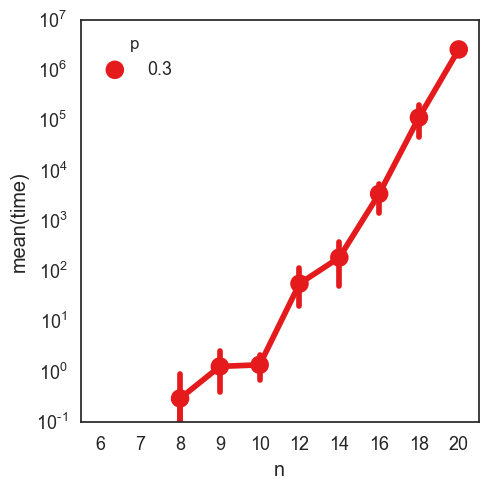

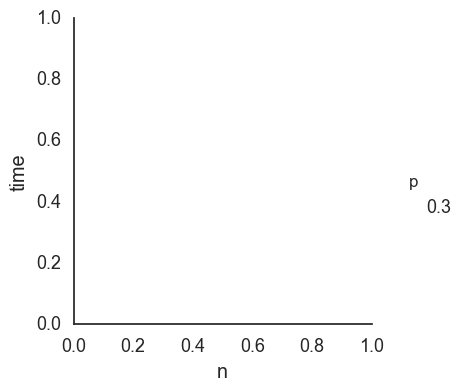

In [190]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
g = sns.factorplot(x="n", y="time", data=df, hue='p',ax=ax1)
ax1.set_yscale('log')
fig.tight_layout()
fig.savefig('p03.png',dpi=200)

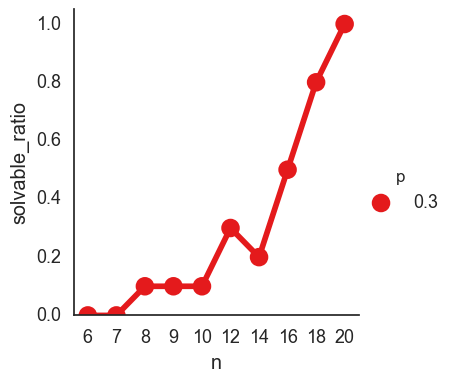

In [192]:
data = []
for p in df.p.unique():
    _df = df[df.p == p]
    for n in _df.n.unique():
        _dfn = _df[_df.n == n]
        l = len(_dfn)
        i = np.isinf(_dfn['optimal_value']).sum()
        data.append({'n':n, 'p':p, 'solvable_ratio': 1.0 -  i / l})

df_solvable = pd.DataFrame(data)
g = sns.factorplot(data=df_solvable,hue='p',x='n',y='solvable_ratio',kind='point')
g.ax.set_ylim(0,1.05)
plt.savefig('p03_solvableratio.png',dpi=200)